## Classification of reviews from imdb.com

Download the dataset from [kaggle](https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)

## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

import gensim
from gensim.parsing.preprocessing import STOPWORDS 

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import auc, roc_auc_score, roc_curve

## Data preprocessing and analysis

In [ ]:
url = "/content/drive/MyDrive/Colab_Notebooks/IMDB_dataset/IMDB_Dataset.csv"

In [ ]:
tweets = pd.read_csv(url)
tweets

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
# check nan
tweets.isna().sum().sum()

0

In [ ]:
# check class balance
tweets["sentiment"].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [ ]:
# LabelEncoder for target
le = LabelEncoder()
tweets['sentiment_encoded'] = le.fit_transform(tweets['sentiment'])
tweets.head(4)

,review,sentiment,sentiment_encoded
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0


In [ ]:
text = tweets['review']
text.loc[2]

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

In [ ]:
# convert all characters to lower case
# remove punctuation
# remove numbers
def clean(text):
    text = text.lower()
    text = re.sub(r'\d+',' ',text)
    text = re.sub(r'<.*?>',' ', text)
    text = re.sub(r'\W+',' ', text)
    return text

In [ ]:
text = text.apply(clean)
text.loc[2]

'i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a light hearted comedy the plot is simplistic but the dialogue is witty and the characters are likable even the well bread suspected serial killer while some may be disappointed when they realize this is not match point risk addiction i thought it was proof that woody allen is still fully in control of the style many of us have grown to love this was the most i d laughed at one of woody s comedies in years dare i say a decade while i ve never been impressed with scarlet johanson in this she managed to tone down her sexy image and jumped right into a average but spirited young woman this may not be the crown jewel of his career but it was wittier than devil wears prada and more interesting than superman a great comedy to go see with friends '

### Lemmatizer

In [ ]:
wn_lemmatizer = WordNetLemmatizer()

In [ ]:
text

0        one of the other reviewers has mentioned that ...
1        a wonderful little production the filming tech...
2        i thought this was a wonderful way to spend ti...
3        basically there s a family where a little boy ...
4        petter mattei s love in the time of money is a...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i am a catholic taught in parochial elementary...
49998    i m going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object

In [ ]:
lemmatized_text = []
for tweet in text:
    lemmatized_text.append(' '.join([wn_lemmatizer.lemmatize(word) for word in tweet.split()]))

### Tokenizer

In [ ]:
reg_tokenizer = RegexpTokenizer('\w+')

In [ ]:
tokenized_text = reg_tokenizer.tokenize_sents(lemmatized_text)

### Stopwords

In [ ]:
STOPWORDS = STOPWORDS

In [ ]:
clean_tokenized_tweets2 = [] 
for i, element in enumerate(tokenized_text):
    if i % 5000 == 0: print(i, end = ' ')
    clean_tokenized_tweets2.append(' '.join([word for word in element if word not in STOPWORDS and len(word) >2]))

0 5000 10000 15000 20000 25000 30000 35000 40000 45000 

In [ ]:
clean_tokenized_tweets2[0]

'reviewer mentioned watching episode hooked right exactly happened thing struck brutality unflinching scene violence set right word trust faint hearted timid pull punch regard drug sex violence hardcore classic use word called nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass face inwards privacy high agenda city home aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement far away main appeal fact wouldn dare forget pretty picture painted mainstream audience forget charm forget romance mess episode saw struck nasty surreal couldn ready watched developed taste got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order away mannered middle class inmate turned prison bitch lack street skill prison experience watching comfortable uncomfortable viewing thats touch darker'

In [ ]:
df = pd.concat([pd.Series(clean_tokenized_tweets2, name='tweet'), 
                pd.Series(tweets['sentiment_encoded'], name='sentiment')], 
               axis=1)

In [ ]:
df.to_csv('clean_tweets', index=False)

## Load the cleaned dataset

`CountVectorizer`: make **bag of words** representation 

`TfidfVectorizer`: make **frequency based** representation

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/IMDB_dataset/clean_tweets')

In [ ]:
df

,tweet,sentiment
0,reviewer mentioned watching episode hooked rig...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically family little boy jake think zombie ...,0
4,petter mattei love time money visually stunnin...,1
...,...,...
49995,thought movie right good job wasn creative ori...,1
49996,bad plot bad dialogue bad acting idiotic direc...,0
49997,catholic taught parochial elementary school nu...,0
49998,going disagree previous comment maltin second ...,0


In [ ]:
cvec = CountVectorizer(ngram_range=(1, 2))
tfid = TfidfVectorizer(ngram_range=(1, 2))

In [ ]:
cvec_representation = cvec.fit_transform(df['tweet'])
tfid_representation = tfid.fit_transform(df['tweet'])

## Training model

In [ ]:
X = cvec_representation
Y = df["sentiment"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=900, \
                                                    shuffle=True, stratify=Y)
X_train.shape, X_test.shape

((40000, 2820554), (10000, 2820554))

In [ ]:
def get_metrics(y_test, y_pred):
    print('Accuracy = %0.4f' % accuracy_score(y_test, y_pred)
          + '\nPrecision = %0.4f' % precision_score(y_test, y_pred)
          + '\nReacall = %0.4f' % recall_score(y_test, y_pred)
          + '\nF1_score = %0.4f' % f1_score(y_test, y_pred))

In [ ]:
def roc_curve_plot(y_test, y_probs):

    fpr, tpr, threshold = roc_curve(y_test, y_probs)
    roc_auc = roc_auc_score(y_test, y_probs)

    plt.figure()
    plt.plot([0, 1], label='Baseline', linestyle='--')
    plt.plot(fpr, tpr, label='Regression')
    plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

Метрики на обучающей выборке:
Accuracy = 0.7570
Precision = 0.7317
Reacall = 0.8115
F1_score = 0.7696
----------------------------------------
Метрики на отложенной тестовой выборке:
Accuracy = 0.7315
Precision = 0.7128
Reacall = 0.7754
F1_score = 0.7428


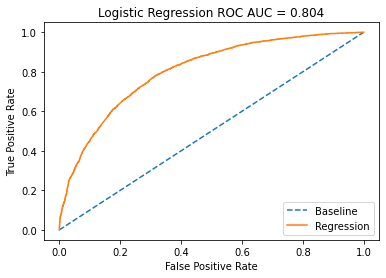

In [ ]:
clf_ranfor = RandomForestClassifier(n_estimators=20, max_depth=15, class_weight='balanced')
clf_ranfor.fit(X_train, y_train)

y_train_pre = clf_ranfor.predict(X_train)
y_test_pre = clf_ranfor.predict(X_test)
y_probs = clf_ranfor.predict_proba(X_test)[:, 1]

print('Метрики на обучающей выборке:')
get_metrics(y_train, y_train_pre)
print('-'*40)
print('Метрики на отложенной тестовой выборке:')
get_metrics(y_test, y_test_pre)
roc_curve_plot(y_test, y_probs)

Метрики на обучающей выборке:
Accuracy = 1.0000
Precision = 1.0000
Reacall = 1.0000
F1_score = 1.0000
----------------------------------------
Метрики на отложенной тестовой выборке:
Accuracy = 0.8963
Precision = 0.8850
Reacall = 0.9110
F1_score = 0.8978


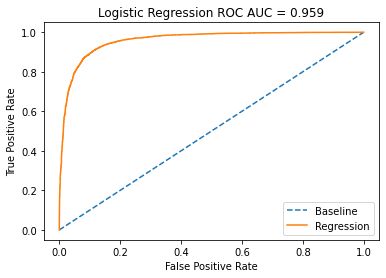

In [ ]:
lr = LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')
lr.fit(X_train, y_train)

y_train_pre = lr.predict(X_train)
y_test_pre = lr.predict(X_test)
y_probs = lr.predict_proba(X_test)[:, 1]

print('Метрики на обучающей выборке:')
get_metrics(y_train, y_train_pre)
print('-'*40)
print('Метрики на отложенной тестовой выборке:')
get_metrics(y_test, y_test_pre)
roc_curve_plot(y_test, y_probs)

In [ ]:
def blend(x):
    return np.int_(0.1 * clf_ranfor.predict(x) + 0.9 * lr.predict(x))

pred_train = blend(X_train)
pred_test = blend(X_test)
print("train:")
get_metrics(y_train, pred_train)
print('------------------------')
print("test:")
get_metrics(y_test, pred_test)

train:
Accuracy = 0.9058
Precision = 1.0000
Reacall = 0.8115
F1_score = 0.8960
------------------------
test:
Accuracy = 0.8296
Precision = 0.9097
Reacall = 0.7318
F1_score = 0.8111
